# Projet Lapage Marketing

## Analyse des différents indicateurs de ventes

On commence par importer nos librairies et données.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

In [3]:
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [4]:
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [5]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [6]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [7]:
transactions.duplicated().sum()

126

In [8]:
transactions = transactions.drop_duplicates()

In [9]:
transactions.duplicated().sum()
#Plus de duplicatas dans la dataframe des transactions

0

On va maintenant réunir nos dataframes avec les méthodes `merge` et `concat` .

In [10]:
merge = customers.merge(transactions, on='client_id')

In [11]:
merge

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686
...,...,...,...,...,...,...
679401,c_84,f,1982,0_1438,2022-05-29 06:11:50.316631,s_215697
679402,c_84,f,1982,0_1020,2021-10-21 03:52:13.863959,s_107849
679403,c_84,f,1982,0_1399,2021-10-01 16:13:18.997813,s_98493
679404,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960


In [12]:
df = merge.merge(products, on='id_prod')

In [13]:
pd.read_csv('Lapage_marketing.csv', index_col='date')

,Unnamed: 0,client_id,sex,birth,id_prod,session_id,price,categ,just_year,age
date,,,,,,,,,,
2021-12-29 09:11:18.860592,0,c_4410,f,1967,0_1316,s_141762,7.20,0,2021,54
2022-03-29 09:11:18.860592,1,c_4410,f,1967,0_1316,s_186233,7.20,0,2022,55
2022-05-29 09:11:18.860592,2,c_4410,f,1967,0_1316,s_215758,7.20,0,2022,55
2021-11-26 03:51:34.068872,3,c_3654,f,1978,0_1316,s_125143,7.20,0,2021,43
2022-08-26 03:51:34.068872,4,c_3654,f,1978,0_1316,s_258546,7.20,0,2022,44
...,...,...,...,...,...,...,...,...,...,...
2021-11-09 09:02:38.299240,679180,c_8138,f,1984,0_394,s_116986,2.14,0,2021,37
2022-08-09 09:02:38.299240,679181,c_8138,f,1984,0_394,s_250653,2.14,0,2022,38
2022-03-09 09:02:38.299240,679182,c_8138,f,1984,0_394,s_176587,2.14,0,2022,38


In [14]:
df.describe()
#On remarque qu'il y a un ou plusieurs valeurs négatives dans la colonne price

,birth,price,categ
count,679185.000000,679185.000000,679185.000000
mean,1977.813675,17.452763,0.441905
std,13.576779,18.329011,0.595027
min,1929.000000,-1.000000,0.000000
25%,1970.000000,8.870000,0.000000
50%,1980.000000,13.990000,0.000000
75%,1987.000000,18.990000,1.000000
max,2004.000000,300.000000,2.000000


In [15]:
df = df[~(df['price'] <= 0)]
#On ne garde que les prix supérieur a 0 on supprime tout les autres qui sont des valeurs abberantes

In [16]:
df.sample(3)

,client_id,sex,birth,id_prod,date,session_id,price,categ
631750,c_222,m,1991,0_2271,2022-02-02 19:19:14.231849,s_158998,13.99,0
145789,c_7690,m,1981,0_1488,2022-12-03 14:46:27.928034,s_306531,4.60,0
452991,c_1869,f,1985,1_433,2022-09-30 18:24:22.142169,s_275823,18.99,1


Nous avons maintenant notre Dataframe final et "nettoyer".

In [17]:
df.shape

(679111, 8)

In [18]:
df.sample(5)

,client_id,sex,birth,id_prod,date,session_id,price,categ
630367,c_5456,f,1994,2_230,2023-01-06 17:52:14.915018,s_322960,57.04,2
118297,c_4067,f,1973,1_363,2023-02-10 02:03:13.132064,s_339378,16.99,1
572509,c_912,m,1964,0_2064,2022-01-12 20:22:13.541985,s_148893,9.85,0
450387,c_5441,f,1957,1_249,2023-01-03 03:31:15.715344,s_321186,22.99,1
543818,c_2767,f,1978,0_1197,2022-10-21 11:55:32.655969,s_285831,6.99,0


In [19]:
df.isna().sum()

client_id     0
sex           0
birth         0
id_prod       0
date          0
session_id    0
price         0
categ         0
dtype: int64

In [20]:
df.dtypes

client_id      object
sex            object
birth           int64
id_prod        object
date           object
session_id     object
price         float64
categ           int64
dtype: object

In [21]:
#Nombre de ventes par client
df['client_id'].value_counts()

c_1609    25488
c_6714     9181
c_3454     6770
c_4958     5195
c_3263      403
          ...  
c_240         1
c_6292        1
c_1624        1
c_8351        1
c_4478        1
Name: client_id, Length: 8600, dtype: int64

In [22]:
#Nombre de ventes par livres - 'id_prod'
total_sales = df['id_prod'].value_counts()
total_sales

1_369     2252
1_417     2189
1_414     2180
1_498     2128
1_425     2096
          ... 
0_1728       1
2_81         1
0_1284       1
0_541        1
0_549        1
Name: id_prod, Length: 3265, dtype: int64

In [23]:
chiffre_affaire = df.groupby('id_prod')['price'].sum().sort_values(ascending=False)
chiffre_affaire
#Chiffre d'affaire de chaque livre

id_prod
2_159     94893.50
2_135     69334.95
2_112     65407.76
2_102     60736.78
2_209     56971.86
            ...   
0_1601        1.99
0_807         1.99
0_1653        1.98
0_1284        1.38
0_1539        0.99
Name: price, Length: 3265, dtype: float64

In [24]:
df.dtypes

client_id      object
sex            object
birth           int64
id_prod        object
date           object
session_id     object
price         float64
categ           int64
dtype: object

On va changer le type de notre colonne date et on va créer une nouvelle colonne en ne reprenant que les années de celle ci.

In [25]:
df.sample(3)

,client_id,sex,birth,id_prod,date,session_id,price,categ
498733,c_6332,f,1978,0_1457,2021-08-25 17:00:10.886182,s_80544,11.99,0
368708,c_3738,m,2002,1_287,2022-05-10 15:27:03.005175,s_206489,29.99,1
515437,c_2147,m,1976,1_73,2022-12-29 19:50:47.303651,s_319160,19.99,1


In [26]:
df['date'].isna().sum()
#On vérifie qu'il n'y a pas de valeurs négative dans la colonne de la date.

0

In [27]:
df["date"] = pd.to_datetime(df['date'])
#On passe la date en type datetime
df['just_year'] = df['date'].dt.year.astype("int64")
#On créer une nouvelle colonne et on y ajoute juste les années
df.sample(n=3)

,client_id,sex,birth,id_prod,date,session_id,price,categ,just_year
63197,c_2694,m,1982,1_431,2021-08-25 17:33:41.871174,s_80557,27.99,1,2021
191117,c_5114,f,1995,2_41,2021-03-04 06:33:20.417430,s_1503,68.99,2,2021
120685,c_8392,f,1978,0_1344,2021-05-03 12:07:24.888676,s_29302,19.04,0,2021


In [28]:
#On créer une colonne contenant l'age
df['age'] = df['just_year'] - df['birth']
df.sample(3)

,client_id,sex,birth,id_prod,date,session_id,price,categ,just_year,age
51893,c_5328,m,1976,1_379,2022-08-28 21:48:57.337022,s_259927,26.99,1,2022,46
75260,c_8204,f,1988,0_1502,2022-11-07 02:52:38.101983,s_293831,8.13,0,2022,34
269031,c_6377,f,1983,0_1090,2022-02-19 10:17:20.880400,s_167543,13.78,0,2022,39


In [29]:
df.dtypes

client_id             object
sex                   object
birth                  int64
id_prod               object
date          datetime64[ns]
session_id            object
price                float64
categ                  int64
just_year              int64
age                    int64
dtype: object

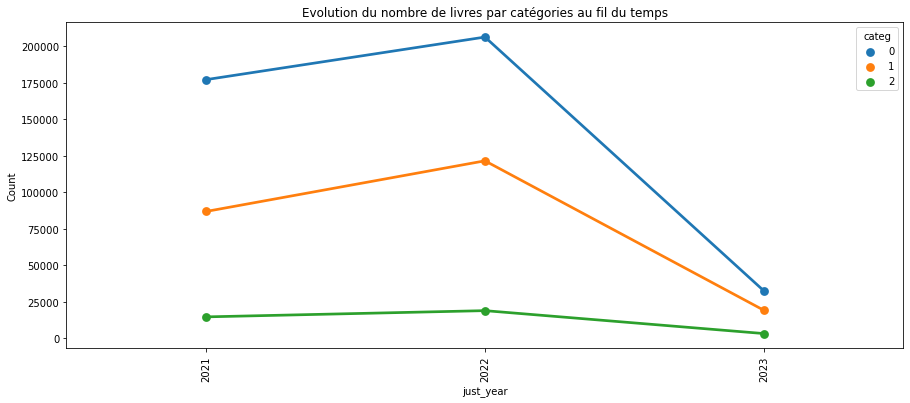

In [30]:
plt.figure(figsize=[15,6])
plt.subplot(111)
plt.title("Evolution du nombre de livres par catégories au fil du temps")
donnees_pointplot=df.groupby(['just_year','categ']).size().reset_index(name='Count')
sns.pointplot(x ='just_year', y ='Count', data = donnees_pointplot, hue="categ")
plt.xticks(rotation=90)
plt.show()

In [31]:
donnees_pointplot

,just_year,categ,Count
0,2021,0,176984
1,2021,1,86716
2,2021,2,14548
3,2022,0,206152
4,2022,1,121412
5,2022,2,18816
6,2023,0,32323
7,2023,1,19041
8,2023,2,3119


In [32]:
df.groupby(['id_prod','price']).size().reset_index(name='Count')


,id_prod,price,Count
0,0_0,3.75,1242
1,0_1,10.99,487
2,0_10,17.95,22
3,0_100,20.60,3
4,0_1000,6.84,432
...,...,...,...
3260,2_95,98.99,4
3261,2_96,47.91,598
3262,2_97,160.99,13
3263,2_98,149.74,1


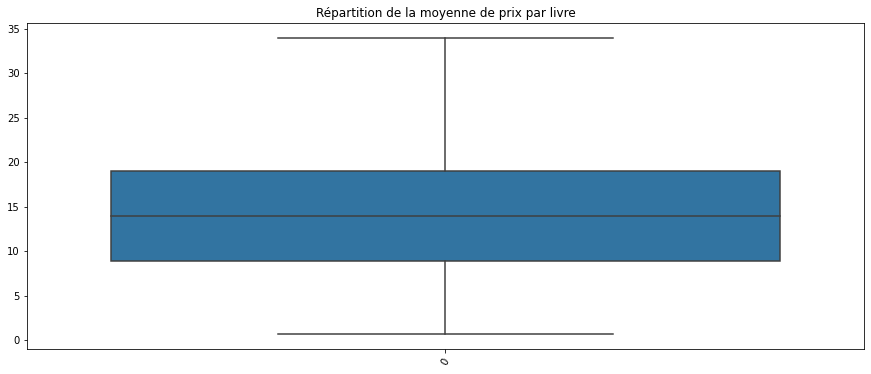

In [33]:
plt.figure(figsize=[15, 6])
plt.title("Répartition de la moyenne de prix par livre")
sns.boxplot(data=df['price'], showfliers=False)
plt.xticks(rotation=60)
plt.show()

In [34]:
df.groupby(['id_prod','categ']).size().reset_index(name='Count')



,id_prod,categ,Count
0,0_0,0,1242
1,0_1,0,487
2,0_10,0,22
3,0_100,0,3
4,0_1000,0,432
...,...,...,...
3260,2_95,2,4
3261,2_96,2,598
3262,2_97,2,13
3263,2_98,2,1


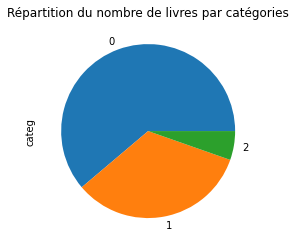

In [35]:
df["categ"].value_counts(normalize=True).plot(kind='pie')
plt.title('Répartition du nombre de livres par catégories')
plt.show()
#Répartition du nombre de livre par catégories

In [36]:
df.groupby('id_prod')['price'].sum().reset_index(name='Count')

,id_prod,Count
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88
...,...,...
3260,2_95,395.96
3261,2_96,28650.18
3262,2_97,2092.87
3263,2_98,149.74


In [37]:
best_seller = df['id_prod'].value_counts().reset_index(name='count').iloc[:10]
best_seller.rename(columns={'index':'books'}, inplace=True)
best_seller #Top des 10 livres les plus vendues


,books,count
0,1_369,2252
1,1_417,2189
2,1_414,2180
3,1_498,2128
4,1_425,2096
5,1_403,1960
6,1_412,1951
7,1_413,1945
8,1_406,1939
9,1_407,1935


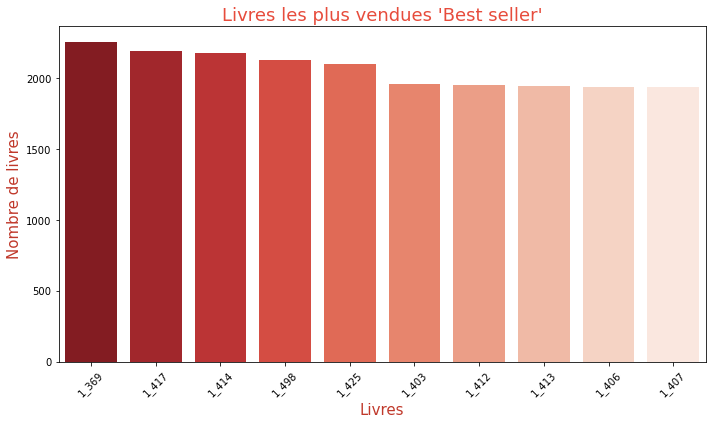

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=best_seller['books'], y=best_seller['count'], palette="Reds_r")
plt.xlabel('Livres', fontsize=15, color='#c0392b')
plt.ylabel("Nombre de livres", fontsize=15, color='#c0392b')
plt.title("Livres les plus vendues 'Best seller'", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 45)
plt.tight_layout()

In [39]:
best_client = df['client_id'].value_counts().reset_index(name='count').iloc[:10]
best_client.rename(columns={'index':'clients'}, inplace=True)
best_client #Top des 10 meilleurs clients

,clients,count
0,c_1609,25488
1,c_6714,9181
2,c_3454,6770
3,c_4958,5195
4,c_3263,403
5,c_2140,402
6,c_2595,398
7,c_2077,384
8,c_1637,380
9,c_7421,379


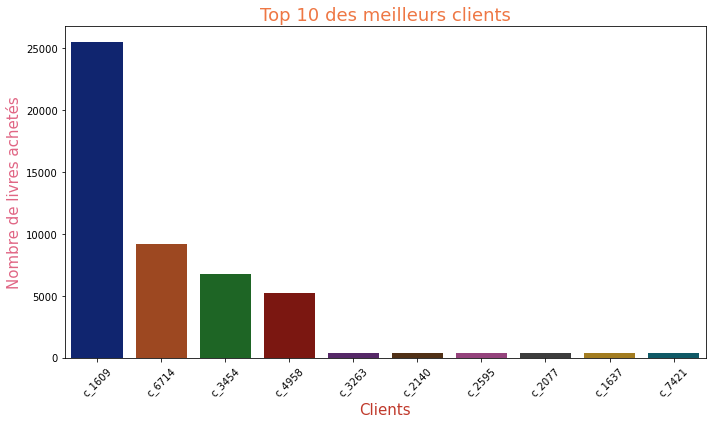

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=best_client['clients'], y=best_client['count'], palette="dark")
plt.xlabel('Clients', fontsize=15, color='#c0392b')
plt.ylabel("Nombre de livres achetés", fontsize=15, color='#c039')
plt.title("Top 10 des meilleurs clients", fontsize=18, color='#e74')
plt.xticks(rotation= 45)
plt.tight_layout()

<AxesSubplot:>

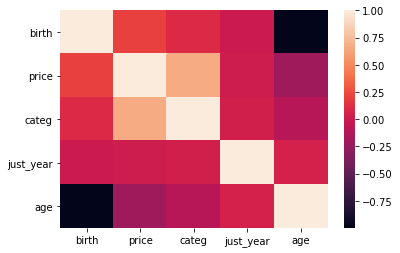

In [41]:
sns.heatmap(df.corr())

In [42]:
best_categories = df['categ'].value_counts().reset_index(name='count').iloc[:10]
best_categories.rename(columns={'index':'categories'}, inplace=True)
best_categories #Nombre de livres vendues par catégories

,categories,count
0,0,415459
1,1,227169
2,2,36483


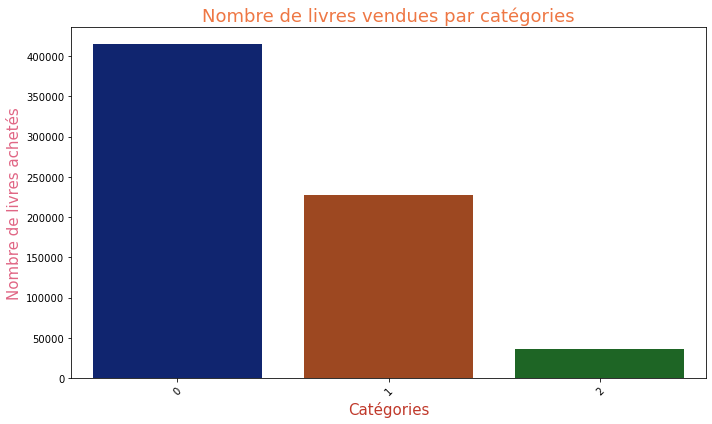

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x=best_categories['categories'], y=best_categories['count'], palette="dark")
plt.xlabel('Catégories', fontsize=15, color='#c0392b')
plt.ylabel("Nombre de livres achetés", fontsize=15, color='#c039')
plt.title("Nombre de livres vendues par catégories", fontsize=18, color='#e74')
plt.xticks(rotation= 45)
plt.tight_layout()

In [44]:
chiffre_affaire2 = df.groupby('id_prod')['price'].sum().reset_index(name='chiffre_affaire')
chiffre_affaire2

,id_prod,chiffre_affaire
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88
...,...,...
3260,2_95,395.96
3261,2_96,28650.18
3262,2_97,2092.87
3263,2_98,149.74


In [45]:
df.to_csv('Lapage_marketing.csv')

In [46]:
datas = pd.read_csv('Lapage_marketing.csv', index_col='date')
datas

,Unnamed: 0,client_id,sex,birth,id_prod,session_id,price,categ,just_year,age
date,,,,,,,,,,
2021-12-29 09:11:18.860592,0,c_4410,f,1967,0_1316,s_141762,7.20,0,2021,54
2022-03-29 09:11:18.860592,1,c_4410,f,1967,0_1316,s_186233,7.20,0,2022,55
2022-05-29 09:11:18.860592,2,c_4410,f,1967,0_1316,s_215758,7.20,0,2022,55
2021-11-26 03:51:34.068872,3,c_3654,f,1978,0_1316,s_125143,7.20,0,2021,43
2022-08-26 03:51:34.068872,4,c_3654,f,1978,0_1316,s_258546,7.20,0,2022,44
...,...,...,...,...,...,...,...,...,...,...
2021-11-09 09:02:38.299240,679180,c_8138,f,1984,0_394,s_116986,2.14,0,2021,37
2022-08-09 09:02:38.299240,679181,c_8138,f,1984,0_394,s_250653,2.14,0,2022,38
2022-03-09 09:02:38.299240,679182,c_8138,f,1984,0_394,s_176587,2.14,0,2022,38


In [47]:
datas.dtypes

Unnamed: 0      int64
client_id      object
sex            object
birth           int64
id_prod        object
session_id     object
price         float64
categ           int64
just_year       int64
age             int64
dtype: object

In [48]:
df.dtypes

client_id             object
sex                   object
birth                  int64
id_prod               object
date          datetime64[ns]
session_id            object
price                float64
categ                  int64
just_year              int64
age                    int64
dtype: object

<Figure size 72x72 with 0 Axes>

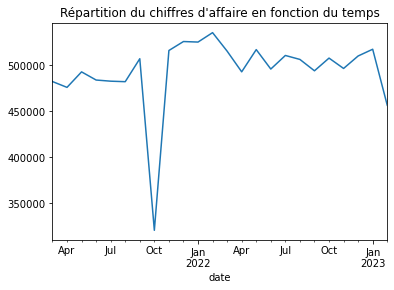

<Figure size 72x72 with 0 Axes>

In [49]:
donnees = df.set_index('date')['price'].resample('M').sum()
donnees.plot()
plt.title("Répartition du chiffres d'affaire en fonction du temps")
plt.figure(figsize=(1,1))

array([[<AxesSubplot:title={'center':'birth'}>]], dtype=object)

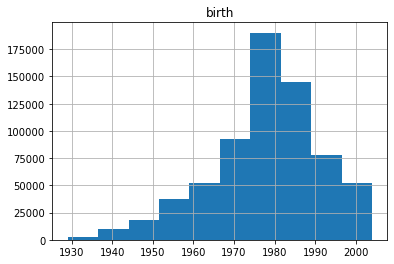

In [50]:
df.hist('birth')

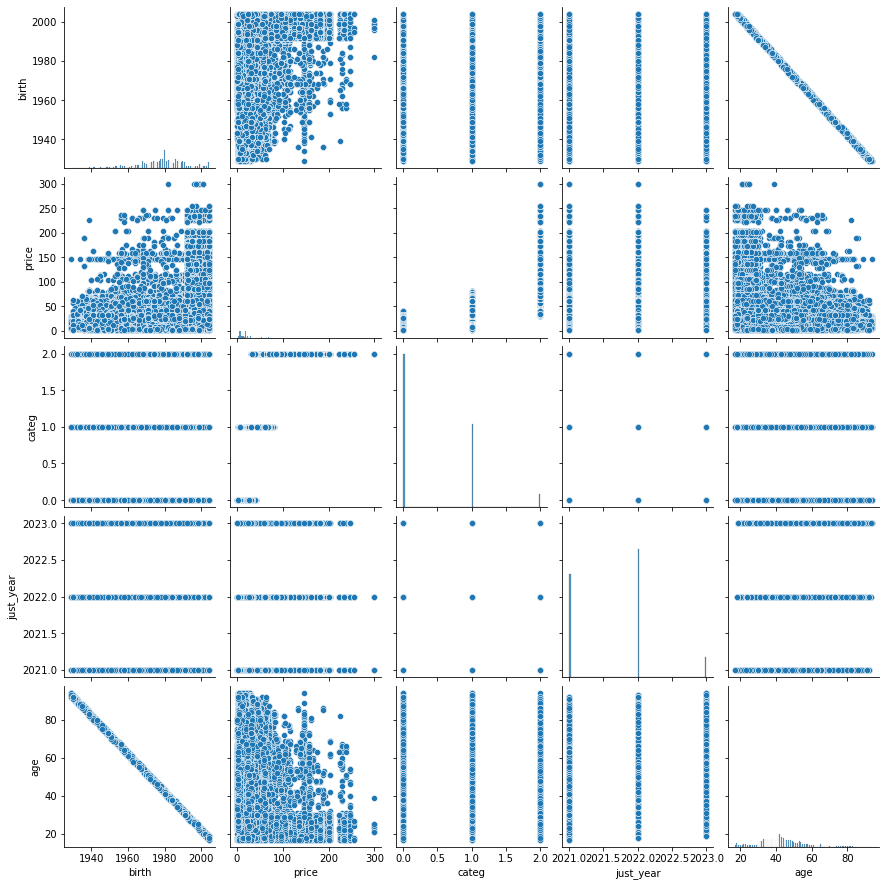

In [51]:
sns.pairplot(data=df)

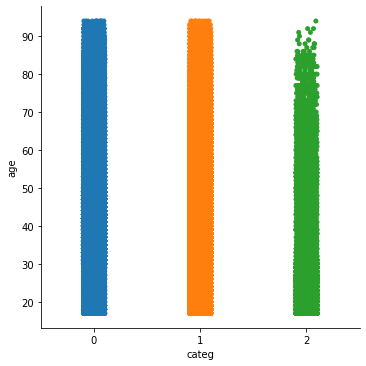

In [52]:
sns.catplot(x='categ', y='age', data=df)

In [53]:
df

,client_id,sex,birth,id_prod,date,session_id,price,categ,just_year,age
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0,2021,54
1,c_4410,f,1967,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0,2022,55
2,c_4410,f,1967,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0,2022,55
3,c_3654,f,1978,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0,2021,43
4,c_3654,f,1978,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0,2022,44
...,...,...,...,...,...,...,...,...,...,...
679180,c_8138,f,1984,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0,2021,37
679181,c_8138,f,1984,0_394,2022-08-09 09:02:38.299240,s_250653,2.14,0,2022,38
679182,c_8138,f,1984,0_394,2022-03-09 09:02:38.299240,s_176587,2.14,0,2022,38
679183,c_8327,m,1972,0_394,2022-06-28 22:44:11.200205,s_230707,2.14,0,2022,50


In [54]:
sns.countplot(data=df, x='sex', y='categ')

ValueError: Cannot pass values for both `x` and `y`